In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/diabetes.csv", 
                  sep=',',  header=1,
                  names=["Number of times pregnant",
                         "Plasma glucose",
                         "blood pressure",
                         "skin fold thickness",
                         "serum insulin",
                         "Body mass",
                         "Diabetes pedigree",
                         "age",
                         "lable"
                         ]
                 )
df

,Number of times pregnant,Plasma glucose,blood pressure,skin fold thickness,serum insulin,Body mass,Diabetes pedigree,age,lable
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [3]:
x = df[["Number of times pregnant",
                         "Plasma glucose",
                         "blood pressure",
                         "skin fold thickness",
                         "serum insulin",
                         "Body mass",
                         "Diabetes pedigree",
                         "age"]].values
x

array([[1.00e+00, 8.50e+01, 6.60e+01, ..., 2.66e+01, 3.51e-01, 3.10e+01],
       [8.00e+00, 1.83e+02, 6.40e+01, ..., 2.33e+01, 6.72e-01, 3.20e+01],
       [1.00e+00, 8.90e+01, 6.60e+01, ..., 2.81e+01, 1.67e-01, 2.10e+01],
       ...,
       [5.00e+00, 1.21e+02, 7.20e+01, ..., 2.62e+01, 2.45e-01, 3.00e+01],
       [1.00e+00, 1.26e+02, 6.00e+01, ..., 3.01e+01, 3.49e-01, 4.70e+01],
       [1.00e+00, 9.30e+01, 7.00e+01, ..., 3.04e+01, 3.15e-01, 2.30e+01]])

In [4]:
y = df["lable"]
y

0      0
1      1
2      0
3      1
4      0
      ..
762    0
763    0
764    0
765    1
766    0
Name: lable, Length: 767, dtype: int64

In [5]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
x_scaled = scaler.transform(x)
x_scaled

array([[-0.84372629, -1.12208597, -0.16024856, ..., -0.68372895,
        -0.36426474, -0.18894038],
       [ 1.23423997,  1.94447577, -0.26357823, ..., -1.10230105,
         0.60470064, -0.1037951 ],
       [-0.84372629, -0.99692019, -0.16024856, ..., -0.49346891,
        -0.91968415, -1.0403932 ],
       ...,
       [ 0.343683  ,  0.0044061 ,  0.14974046, ..., -0.73446496,
        -0.68423462, -0.27408566],
       [-0.84372629,  0.16086333, -0.47023757, ..., -0.23978884,
        -0.37030191,  1.17338414],
       [-0.84372629, -0.8717544 ,  0.04641078, ..., -0.20173684,
        -0.47293375, -0.87010264]])

In [6]:
from sklearn.model_selection import train_test_split
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

In [7]:
from sklearn.tree import DecisionTreeClassifier

pimaTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
pimaTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [8]:
pimaTree.fit(x_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [9]:
predTree = pimaTree.predict(x_testset)

In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.6666666666666666


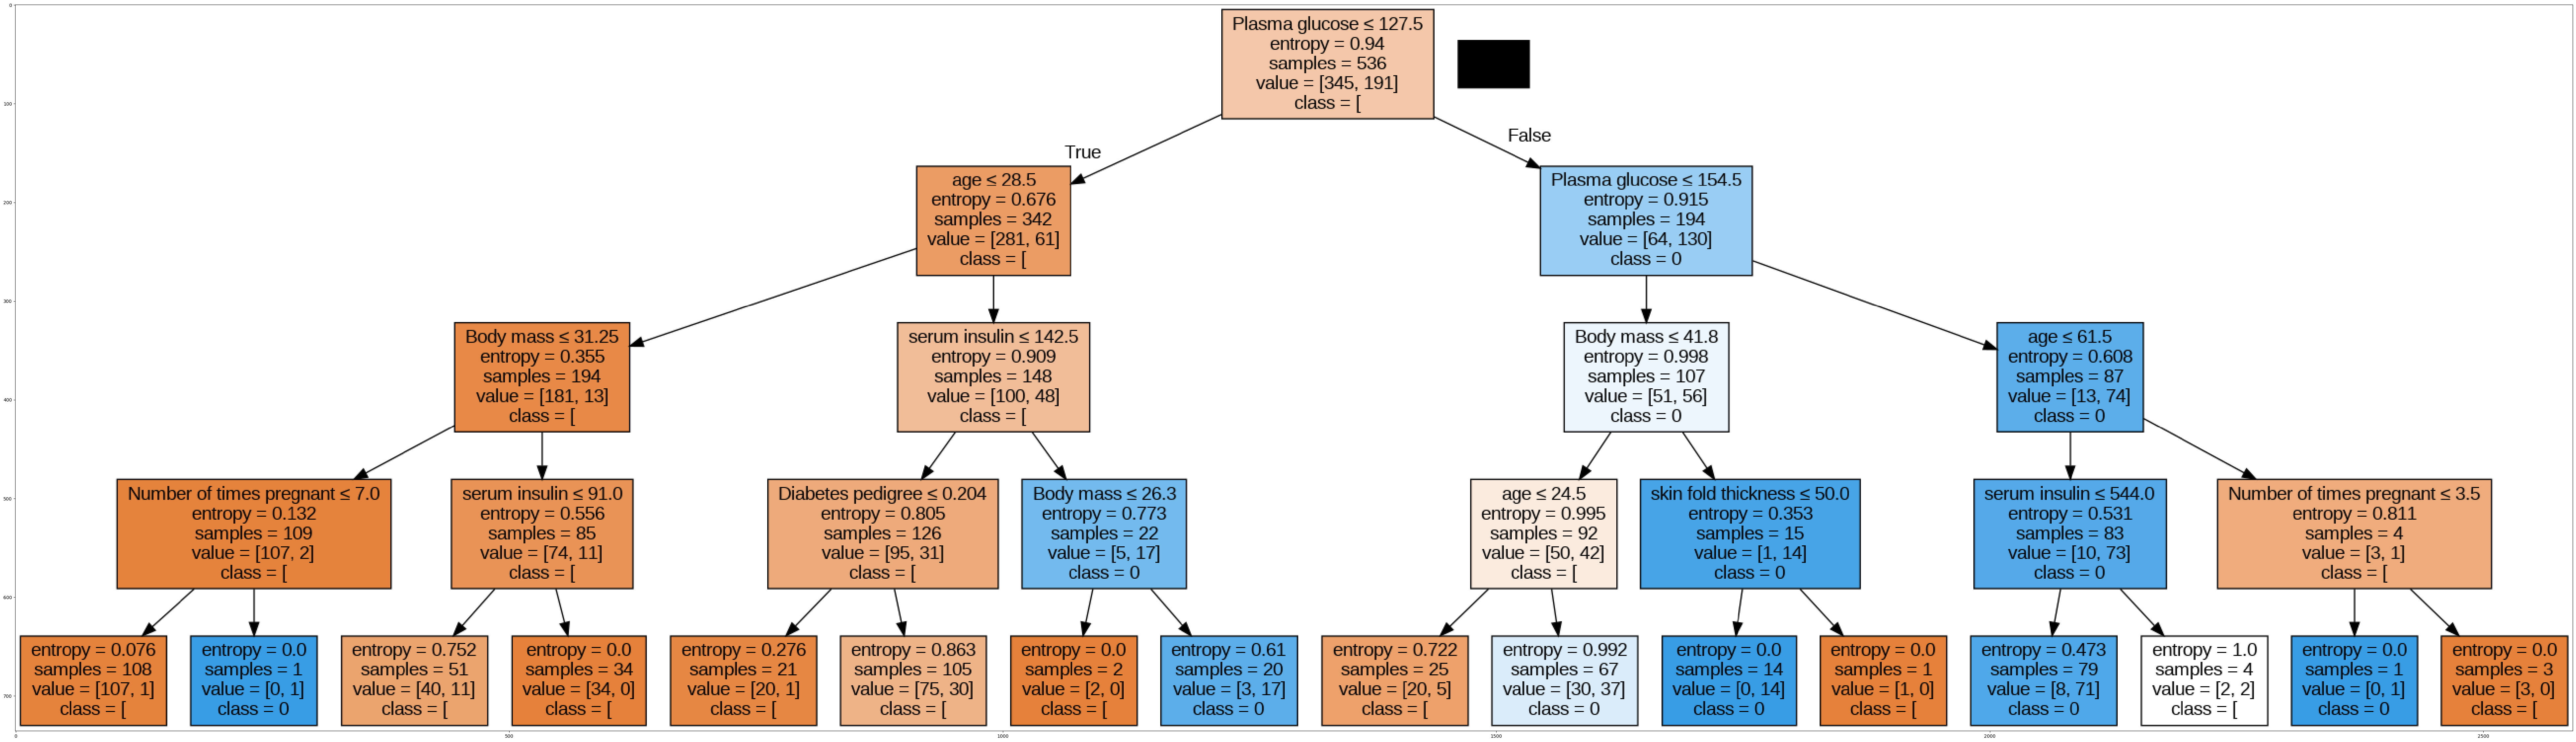

In [11]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot_data = StringIO()
filename = "tree.png"
featureNames = df.columns[0:8]
out=tree.export_graphviz(pimaTree,feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(y_trainset)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 41  35]
 [ 42 113]]


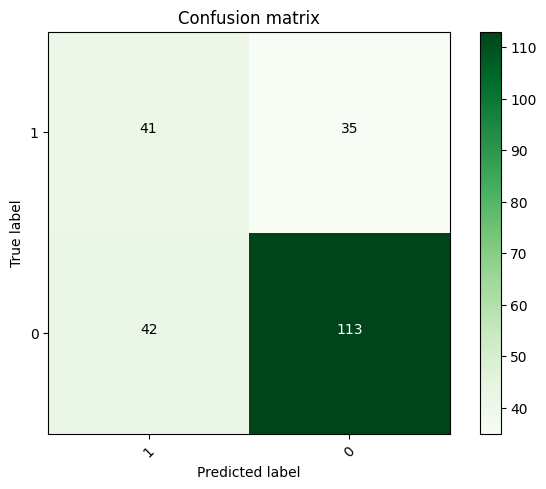

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, predTree, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','0'],normalize= False,  title='Confusion matrix')